In [2]:
from collections import Counter
from konlpy.tag import Hannanum
from wordcloud import WordCloud
from PIL import Image
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt

def flatten(l):
  flat_list = []
  for elem in l:
    if isinstance(elem, list):
      for e in elem:
        flat_list.append(e)
    else:
      flat_list.append(elem)
  return flat_list

In [3]:
with open('후배들에게.txt', 'r', encoding='UTF-8') as f:
  lines = f.readlines()

hannanum = Hannanum()

temp = []
for i in range(len(lines)):
  temp.append(hannanum.nouns(lines[i]))

word_list = flatten(temp)

stop_words = ['카루', '라에', '세타', '실비아', '키아나']

word_list = [x for x in word_list if not x in stop_words]
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10)

상대     48
생각     26
사람     22
자신     15
모습     14
대상     13
중요      8
고민      8
우리      8
공동체     7
dtype: int64

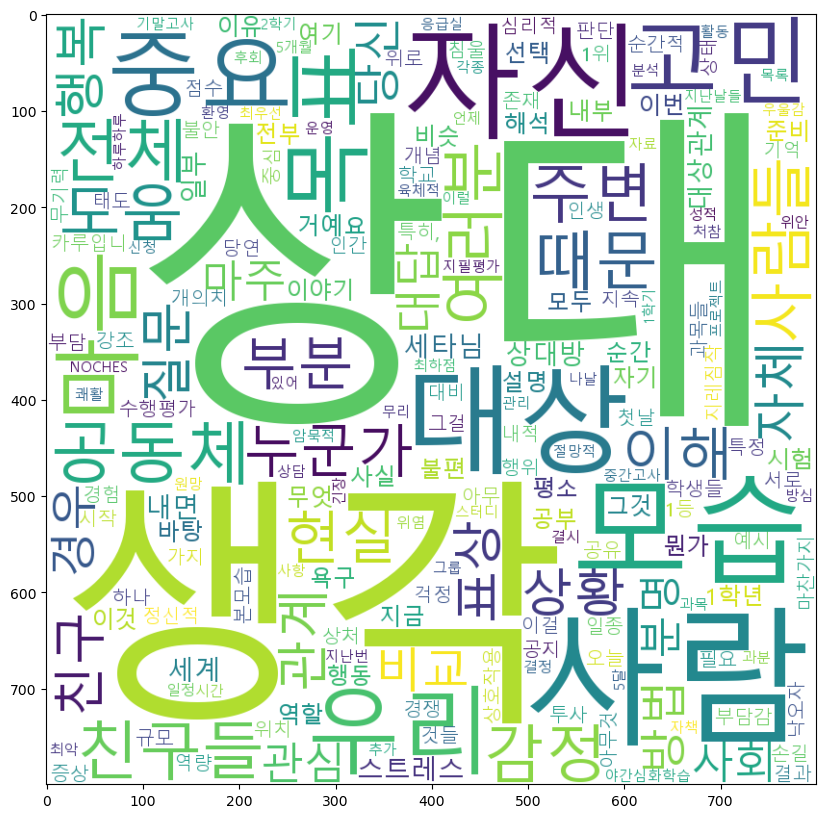

In [4]:
wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800,
    height=800,
    background_color='white'
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = np.array(wordcloud.to_image())

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation = 'bilinear')
plt.show()
fig.savefig('wordcloud.png')

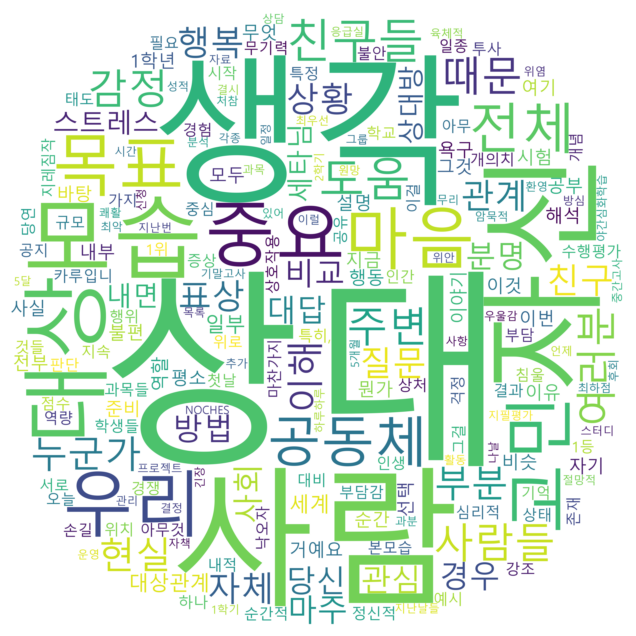

In [7]:
wc_mask = WordCloud(
    font_path='malgun.ttf',
    mask=np.array(Image.open('Rolling Ress.png')),
    background_color='white'
)
wc_mask = wc_mask.generate_from_frequencies(count)
                                
plt.figure(figsize=(8,8))
plt.imshow(wc_mask, interpolation='bilinear')
                                                           
plt.axis("off")
plt.show()     